In [2]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import folium  #needed for interactive map
from folium.plugins import HeatMap

# Cargue de Paquetes

In [3]:
df = pd.read_csv('C:/Users/JOSE CV/Downloads/La Ascensión S.A/MinTIC/Beneficiarios.csv',sep='\t',encoding='utf-16-le')

# EDA

In [4]:
df.head()

,#,DocEntry,Sexo,Numero de Documento,Parentesco,Fecha Nacimiento,Fecha Retiro,Fecha Siniestro,Fecha Crea Contrato,Unnamed: 9
0,1,1,F,31418546,HERM,24/10/1972,NaN,NaN,04/11/2008,NaN
1,2,1,F,22103662,TITU,20/10/1953,NaN,NaN,04/11/2008,NaN
2,3,1,M,96052118163,SOBR,21/05/1996,NaN,NaN,04/11/2008,NaN
3,4,1,M,98091958470,CUÑA,19/09/1990,NaN,NaN,04/11/2008,NaN
4,5,1,F,43462250,PRIM,28/01/1980,NaN,NaN,04/11/2008,NaN


In [22]:
df.drop(columns='Unnamed: 9',inplace=True)

## Cantidad de Faltantes

In [23]:
Conteo = df.isnull().sum().reset_index(name='Count_NA')
Conteo['percent NA']=Conteo['Count_NA']/df.shape[0]*100
df.shape[0]
Conteo

,index,Count_NA,percent NA
0,#,0,0.000000
1,DocEntry,0,0.000000
2,Sexo,55,0.002099
3,Numero de Documento,58,0.002213
4,Parentesco,0,0.000000
5,Fecha Nacimiento,55,0.002099
6,Fecha Retiro,2541018,96.964658
7,Fecha Siniestro,2560846,97.721289
8,Fecha Crea Contrato,394,0.015035


* Es normal la cantidad de faltantes en `Fecha Retiro` dado que esta variable representa cuantos usarios se han retirado 
* Es normal la cantidad de faltantes en  `Fecha Siniestro` dado que esta variable representa  cuantos usarios han hecho uso del servicio, es decir, han fallecido

## Comportamiento variables

#### `DocEntry`

In [5]:
df['DocEntry'].value_counts()

114713    37
63504     32
58709     29
29876     28
25356     27
          ..
66881      1
66877      1
66873      1
231317     1
249589     1
Name: DocEntry, Length: 391334, dtype: int64

#### `Sexo`

In [6]:
df['Sexo'].value_counts()

M    1415556
F    1204260
N        683
m          3
f          2
E          1
L          1
Name: Sexo, dtype: int64

Se requiere realizar la calidad del dato:
* Que significa `N`
* Modificar `E`, `L`

#### `Parentesco`

In [7]:
df['Parentesco'].value_counts()

HJOA      532160
HERM      468128
0         391296
MDRE      182667
SOBR      154972
ESPO      145472
PDRE      134571
TITU       95056
NIET       82239
SUEG       81417
CUÑA       73919
TIO        69635
PRIM       45662
OTRO       40694
COMP       29415
HJAS       24689
ABUE       24327
YERN       12057
NURA       10787
PDAT        7147
MASCO2      4084
MASCO       2646
MDAT        2339
MASCO3      1939
CONT        1667
HNOD        1121
HJOD         438
NOCH          14
PADRE          2
AMAYOR         1
Name: Parentesco, dtype: int64

Pedir explicación de las siglas que se manejan

#### `Fechas`

In [24]:
df.columns

Index(['#', 'DocEntry', 'Sexo', 'Numero de Documento', 'Parentesco',
       'Fecha Nacimiento', 'Fecha Retiro', 'Fecha Siniestro',
       'Fecha Crea Contrato'],
      dtype='object')

In [31]:
import datetime as dt
from datetime import datetime

In [80]:
df['Fecha Nacimiento']=pd.to_datetime(df['Fecha Nacimiento'], format='%d/%m/%Y', errors = 'coerce')
df['Fecha Retiro']=pd.to_datetime(df['Fecha Retiro'], format='%d/%m/%Y', errors = 'coerce')
df['Fecha Siniestro']=pd.to_datetime(df['Fecha Siniestro'], format='%d/%m/%Y', errors = 'coerce')

In [81]:
df['FN_year'] = df['Fecha Nacimiento'].dt.year
df['FN_month']=df['Fecha Nacimiento'].dt.month

In [82]:
df['FR_year'] = df['Fecha Retiro'].dt.year
df['FR_month']=df['Fecha Retiro'].dt.month
df['FR_day']=df['Fecha Retiro'].dt.day_name()

In [83]:
df['FS_year'] = df['Fecha Siniestro'].dt.year
df['FS_month']=df['Fecha Siniestro'].dt.month
df['FS_day']=df['Fecha Siniestro'].dt.day_name()

In [84]:
df['FR_year']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
2620556   NaN
2620557   NaN
2620558   NaN
2620559   NaN
2620560   NaN
Name: FR_year, Length: 2620561, dtype: float64

#### EDAD

In [60]:
from datetime import date

def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [76]:
df['Age_Cal']=df['Fecha Nacimiento'].apply(lambda x: calculate_age(x))

In [77]:
Frecuencias=df['Age_Cal'].value_counts().reset_index(name='Count').sort_values('Count',ascending=False)
Frecuencias

,index,Count
0,32.0,187577
1,31.0,46683
2,30.0,44818
3,29.0,44525
4,28.0,44169
...,...,...
117,117.0,3
118,113.0,3
119,121.0,2
120,118.0,2


<AxesSubplot:xlabel='Age_Cal', ylabel='Count'>

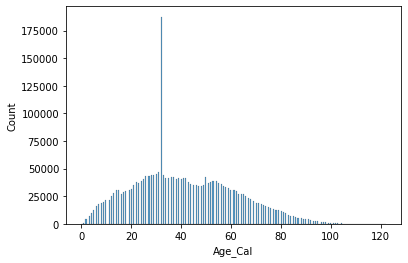

In [78]:
sns.histplot(data=df,x='Age_Cal')

El pico que se presenta en el histograma es en la edad de 32 años:
* Porque esta ocurriendo esto?

#### `Fecha Nacimiento`

In [59]:
df['FN_year'].value_counts().reset_index(name='Count').sort_values('Count',ascending=False)

,index,Count
0,1990.0,185549
1,1991.0,48368
2,1989.0,44589
3,1992.0,44247
4,1993.0,44053
...,...,...
119,1904.0,2
120,1901.0,1
121,1902.0,1
122,1900.0,1


In [57]:
df['FN_month'].value_counts().reset_index(name='Count').sort_values('Count').sort_values('Count',ascending=False)

,index,Count
11,2.0,102170
10,11.0,106876
9,4.0,107471
8,3.0,108661
7,6.0,109915
6,5.0,110158
5,7.0,110863
4,8.0,113849
3,10.0,116501
2,9.0,117201


#### `Parentesco`

<AxesSubplot:xlabel='FR_month', ylabel='Count'>

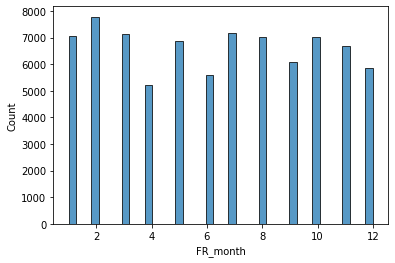

In [85]:
sns.histplot(data=df,x='FR_month')

<AxesSubplot:xlabel='FR_year', ylabel='Count'>

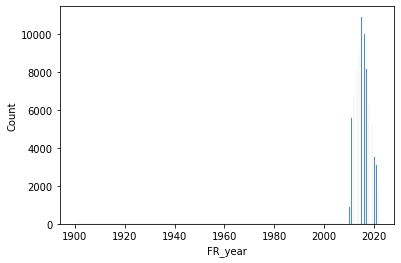

In [86]:
sns.histplot(data=df,x='FR_year')

<AxesSubplot:xlabel='FS_month', ylabel='Count'>

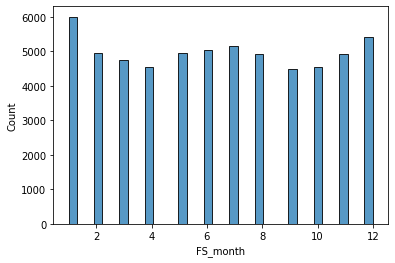

In [87]:
sns.histplot(data=df,x='FS_month')

Al parecer comienza un aumento de los fallecimientos en diciembre presentando la frecuencia mas alta en **Enero**, la siguiente alza de fallecimientos se presenta a mitad de año

<AxesSubplot:xlabel='FS_year', ylabel='Count'>

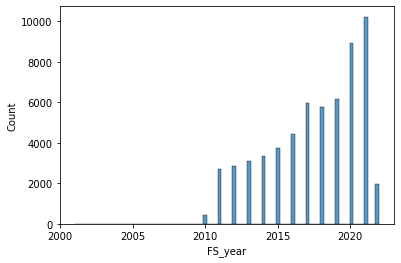

In [88]:
sns.histplot(data=df,x='FS_year')

In [ ]:
df['Parentesco'].value_counts()

HJOA      532160
HERM      468128
0         391296
MDRE      182667
SOBR      154972
ESPO      145472
PDRE      134571
TITU       95056
NIET       82239
SUEG       81417
CUÑA       73919
TIO        69635
PRIM       45662
OTRO       40694
COMP       29415
HJAS       24689
ABUE       24327
YERN       12057
NURA       10787
PDAT        7147
MASCO2      4084
MASCO       2646
MDAT        2339
MASCO3      1939
CONT        1667
HNOD        1121
HJOD         438
NOCH          14
PADRE          2
AMAYOR         1
Name: Parentesco, dtype: int64

#### `Parentesco`

In [ ]:
df['Parentesco'].value_counts()

HJOA      532160
HERM      468128
0         391296
MDRE      182667
SOBR      154972
ESPO      145472
PDRE      134571
TITU       95056
NIET       82239
SUEG       81417
CUÑA       73919
TIO        69635
PRIM       45662
OTRO       40694
COMP       29415
HJAS       24689
ABUE       24327
YERN       12057
NURA       10787
PDAT        7147
MASCO2      4084
MASCO       2646
MDAT        2339
MASCO3      1939
CONT        1667
HNOD        1121
HJOD         438
NOCH          14
PADRE          2
AMAYOR         1
Name: Parentesco, dtype: int64